In [19]:
import pandas as pd
df = pd.read_csv('../data/gold/schengen-visa.csv')
pd.options.display.float_format = '{:,.2f}'.format

In [34]:
df['visas_applied'] = df['visas_applied'].astype('int')
df['visas_issued'] = df['visas_issued'].astype('int')
df['visas_not_issued'] = df['visas_not_issued'].astype('int')
df['year'] = df['year'].astype('str')
df['date'] = pd.to_datetime(df['year'], format='%Y')

In [35]:
df.dtypes

schengen_state               object
origin_country               object
origin_consulate             object
visas_applied                 int64
visas_issued                  int64
visas_not_issued              int64
visa_refusal_rate           float64
year                         object
date                 datetime64[ns]
dtype: object

In [36]:
df.describe()

,visas_applied,visas_issued,visas_not_issued,visa_refusal_rate
count,"16,544.00","16,544.00","16,544.00","16,258.00"
mean,"6,643.86","5,965.76",573.40,0.12
std,"28,320.92","27,129.75","2,810.95",0.17
min,0.00,0.00,0.00,0.00
25%,47.75,37.00,1.00,0.01
50%,580.00,457.00,27.00,0.05
75%,"3,310.50","2,666.50",302.00,0.17
max,"914,314.00","908,145.00","127,615.00",1.00


In [37]:
df.head()

,schengen_state,origin_country,origin_consulate,visas_applied,visas_issued,visas_not_issued,visa_refusal_rate,year,date
0,Austria,ALBANIA,TIRANA,50,39,6,0.13,2022,2022-01-01
1,Austria,ALGERIA,ALGIERS,2047,1213,831,0.41,2022,2022-01-01
2,Austria,ARGENTINA,BUENOS AIRES,18,18,0,0.00,2022,2022-01-01
3,Austria,AUSTRALIA,CANBERRA,1776,1751,22,0.01,2022,2022-01-01
4,Austria,AZERBAIJAN,BAKU,1788,1751,33,0.02,2022,2022-01-01


<AxesSubplot:xlabel='year'>

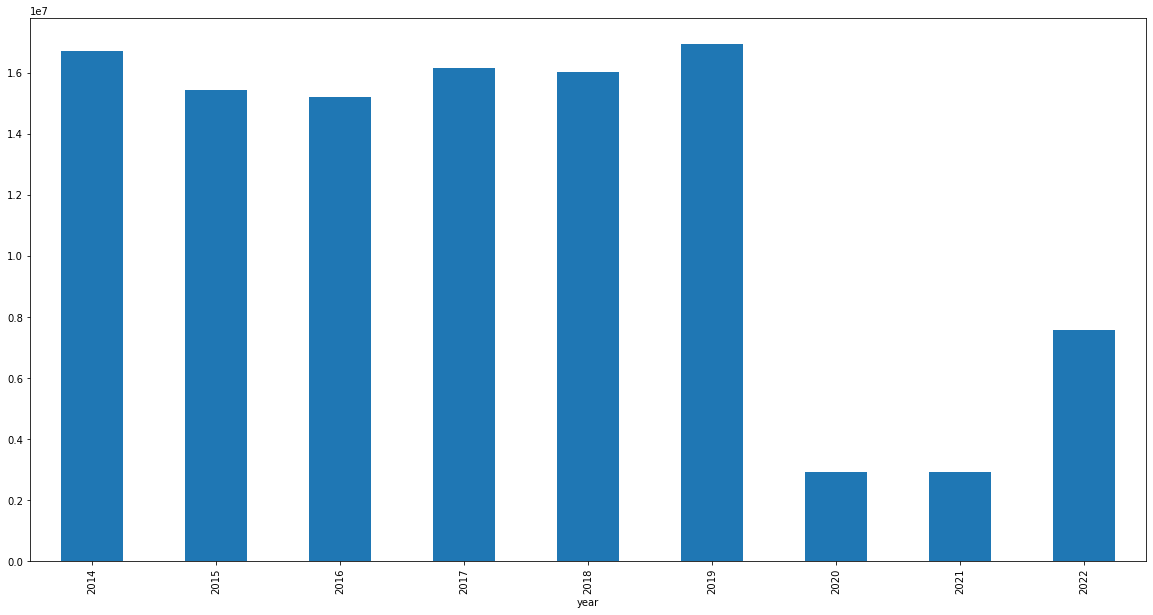

In [70]:
df.groupby(['year'])['visas_applied'].sum().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='year'>

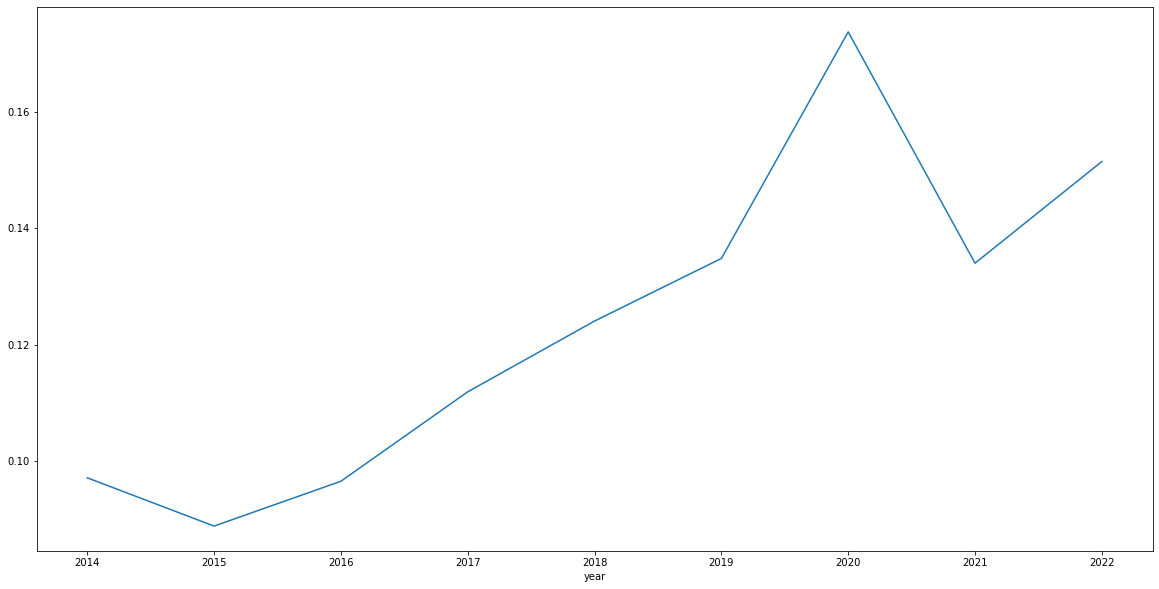

In [45]:
df.groupby(['year'])['visa_refusal_rate'].mean().plot.line(figsize=(20,10))

<AxesSubplot:xlabel='year'>

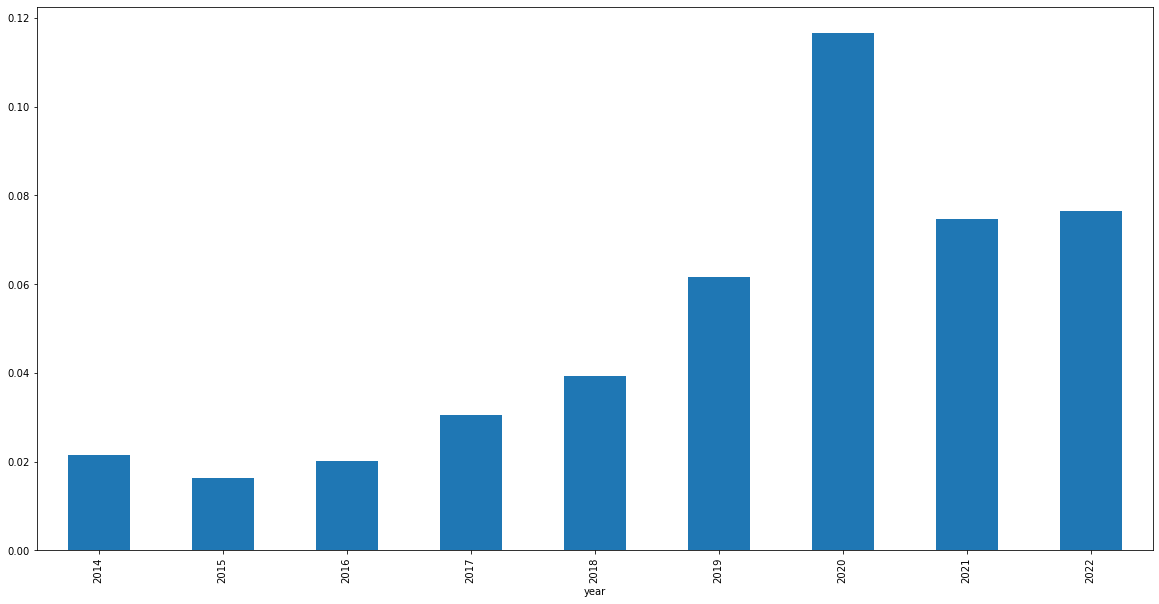

In [73]:
df.where(df["origin_country"] == 'KAZAKHSTAN').groupby(['year'])['visa_refusal_rate'].mean().plot.bar(figsize=(20,10))

<AxesSubplot:xlabel='date'>

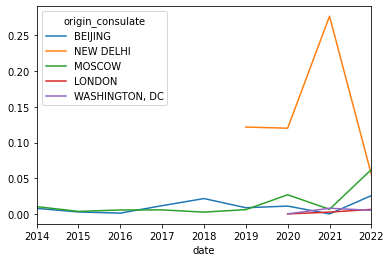

In [52]:
df2 = df.pivot(index='date', columns=['schengen_state','origin_consulate'], values='visa_refusal_rate')

In [56]:
df2.unstack().head()

schengen_state  origin_consulate  date      
Austria         TIRANA            2014-01-01   0.03
                                  2015-01-01   0.05
                                  2016-01-01   0.00
                                  2017-01-01   0.08
                                  2018-01-01   0.22
dtype: float64

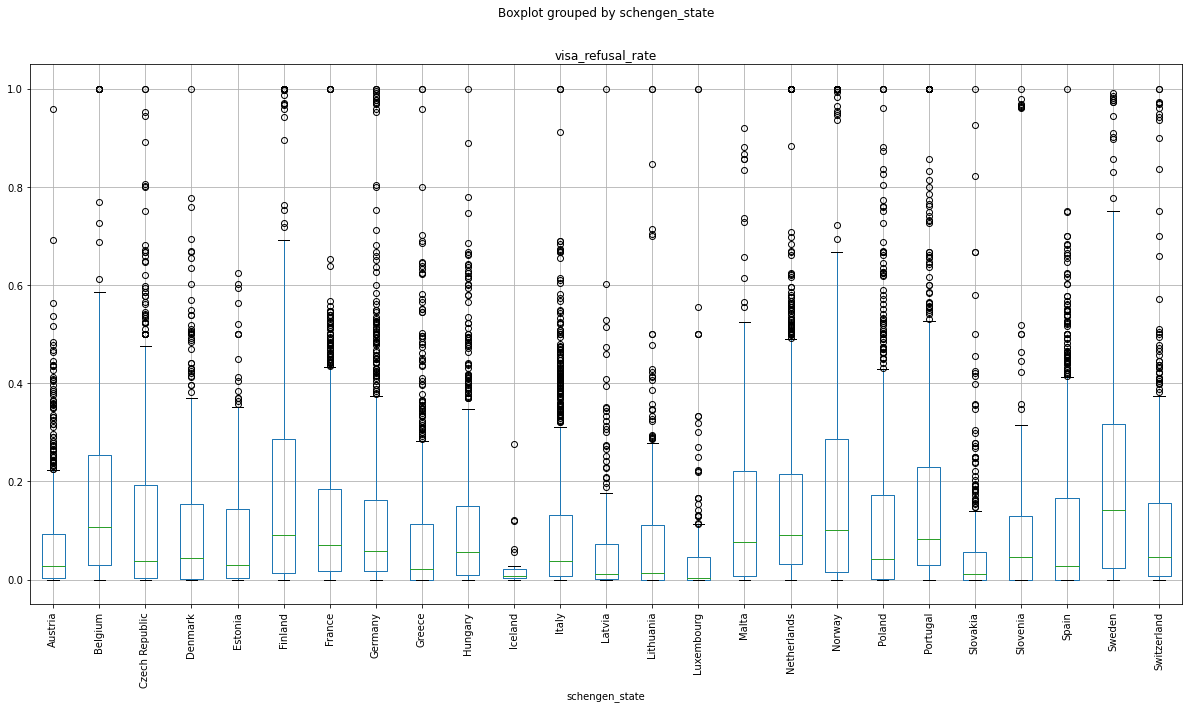

In [40]:
boxplot = df.boxplot(column='visa_refusal_rate', by='schengen_state', rot=90, figsize=(20,10))

<AxesSubplot:xlabel='year'>

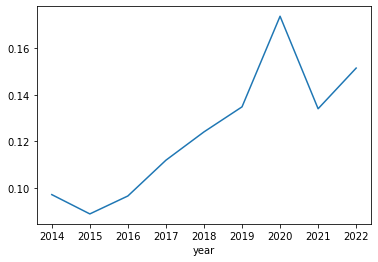

In [10]:
df.groupby(['year'])['visa_refusal_rate'].mean().plot.line()

In [9]:
df.where(df['year'] == 2020).groupby(['year','schengen_state'])['visa_refusal_rate'].mean()

year    schengen_state
2020.0  Austria           0.065098
        Belgium           0.198698
        Czech Republic    0.177749
        Denmark           0.141567
        Estonia           0.107005
        Finland           0.387950
        France            0.160465
        Germany           0.163381
        Greece            0.123521
        Hungary           0.174624
        Iceland           0.031560
        Italy             0.158023
        Latvia            0.099492
        Lithuania         0.193530
        Luxembourg        0.053278
        Malta             0.236467
        Netherlands       0.214005
        Norway            0.364404
        Poland            0.226439
        Portugal          0.277193
        Slovakia          0.078303
        Slovenia          0.195022
        Spain             0.125413
        Sweden            0.256335
        Switzerland       0.125177
Name: visa_refusal_rate, dtype: float64

In [10]:
df.groupby(['origin_country'])['visa_refusal_rate'].mean()

origin_country
AFGHANISTAN    0.169694
ALBANIA        0.106937
ALGERIA        0.391239
ANDORRA        0.002244
ANGOLA         0.334664
                 ...   
VIET NAM       0.098812
VIETNAM        0.103798
YEMEN          0.132355
ZAMBIA         0.136955
ZIMBABWE       0.096436
Name: visa_refusal_rate, Length: 192, dtype: float64